In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb 

In [14]:
n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128 

In [15]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=n_unique_words)

17464789/17464789 [==============================] - 2s 0us/step


In [27]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test) 

In [29]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [30]:
history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy']) 

Epoch 1/12
196/196 [==============================] - 267s 1s/step - loss: 0.4424 - accuracy: 0.7836 - val_loss: 0.3134 - val_accuracy: 0.8676
Epoch 2/12
196/196 [==============================] - 308s 2s/step - loss: 0.2447 - accuracy: 0.9064 - val_loss: 0.3173 - val_accuracy: 0.8700
Epoch 3/12
196/196 [==============================] - 346s 2s/step - loss: 0.1866 - accuracy: 0.9316 - val_loss: 0.3342 - val_accuracy: 0.8678
Epoch 4/12
196/196 [==============================] - 351s 2s/step - loss: 0.1473 - accuracy: 0.9495 - val_loss: 0.3898 - val_accuracy: 0.8594
Epoch 5/12
196/196 [==============================] - 329s 2s/step - loss: 0.1077 - accuracy: 0.9632 - val_loss: 0.4428 - val_accuracy: 0.8530
Epoch 6/12
196/196 [==============================] - 327s 2s/step - loss: 0.0798 - accuracy: 0.9735 - val_loss: 0.6134 - val_accuracy: 0.8501
Epoch 7/12
196/196 [==============================] - 319s 2s/step - loss: 0.0639 - accuracy: 0.9794 - val_loss: 0.5554 - val_accuracy: 0.8516

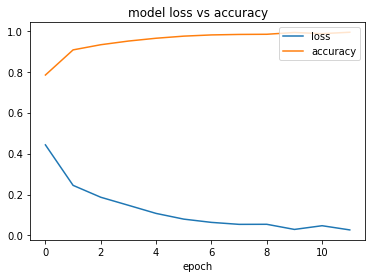

In [31]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 